In [1]:
require(quantmod)

Loading required package: quantmod
Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Loading required package: TTR
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Version 0.4-0 included new data defaults. See ?getSymbols.


In [2]:
library("quantmod")

In [3]:
library("forecast")
library("fUnitRoots")

Registered S3 methods overwritten by 'forecast':
  method             from    
  fitted.fracdiff    fracdiff
  residuals.fracdiff fracdiff
Loading required package: timeDate
Loading required package: timeSeries

Attaching package: 'timeSeries'

The following object is masked from 'package:zoo':

    time<-

Loading required package: fBasics

Attaching package: 'fBasics'

The following object is masked from 'package:TTR':

    volatility



In [4]:
library(fBasics)

###### DATA LOAD

In [5]:
data = getSymbols(Symbols="TSLA", src = "yahoo", from= "2010-06-29", to = "2019-12-01", auto.assign = FALSE)

'getSymbols' currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
'loadSymbols' to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.



In [6]:
head(data)

           TSLA.Open TSLA.High TSLA.Low TSLA.Close TSLA.Volume TSLA.Adjusted
2010-06-29     19.00     25.00    17.54      23.89    18766300         23.89
2010-06-30     25.79     30.42    23.30      23.83    17187100         23.83
2010-07-01     25.00     25.92    20.27      21.96     8218800         21.96
2010-07-02     23.00     23.10    18.71      19.20     5139800         19.20
2010-07-06     20.00     20.00    15.83      16.11     6866900         16.11
2010-07-07     16.40     16.63    14.98      15.80     6921700         15.80

In [7]:
tail(data)

           TSLA.Open TSLA.High TSLA.Low TSLA.Close TSLA.Volume TSLA.Adjusted
2019-11-21    354.51    360.84   354.00     354.83     6110000        354.83
2019-11-22    340.16    341.00   330.00     333.04    16870600        333.04
2019-11-25    344.32    344.57   334.46     336.34    12339500        336.34
2019-11-26    335.27    335.50   327.10     328.92     7947400        328.92
2019-11-27    331.12    333.93   328.57     331.29     5555600        331.29
2019-11-29    331.11    331.26   327.50     329.94     2465600        329.94

In [8]:
data1 = data$TSLA.Adjusted

In [9]:
price = as.numeric(data1)

In [10]:
head(price)

[1] 23.89 23.83 21.96 19.20 16.11 15.80

In [11]:
tail(price)

[1] 354.83 333.04 336.34 328.92 331.29 329.94

In [12]:
basicStats(price)

,price
nobs,2373.000000
NAs,0.000000
Minimum,15.800000
Maximum,385.000000
1. Quartile,34.180000
3. Quartile,262.070007
Mean,181.431854
Median,210.940002
Sum,430537.790204
SE Mean,2.329279


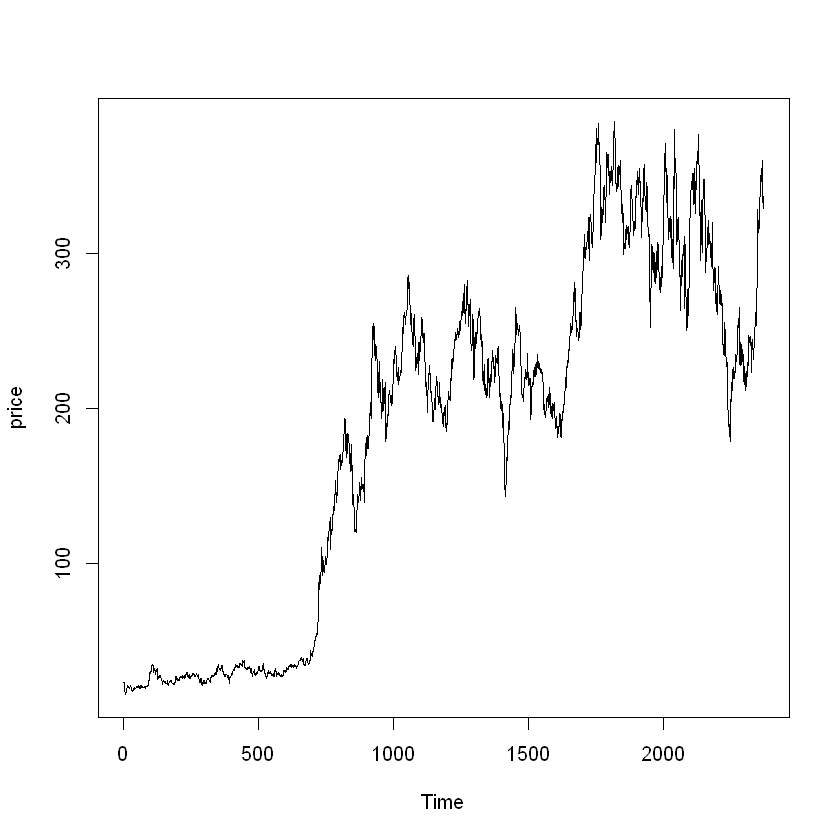

In [13]:
ts.plot(price)

In [14]:
log_price = log(price)

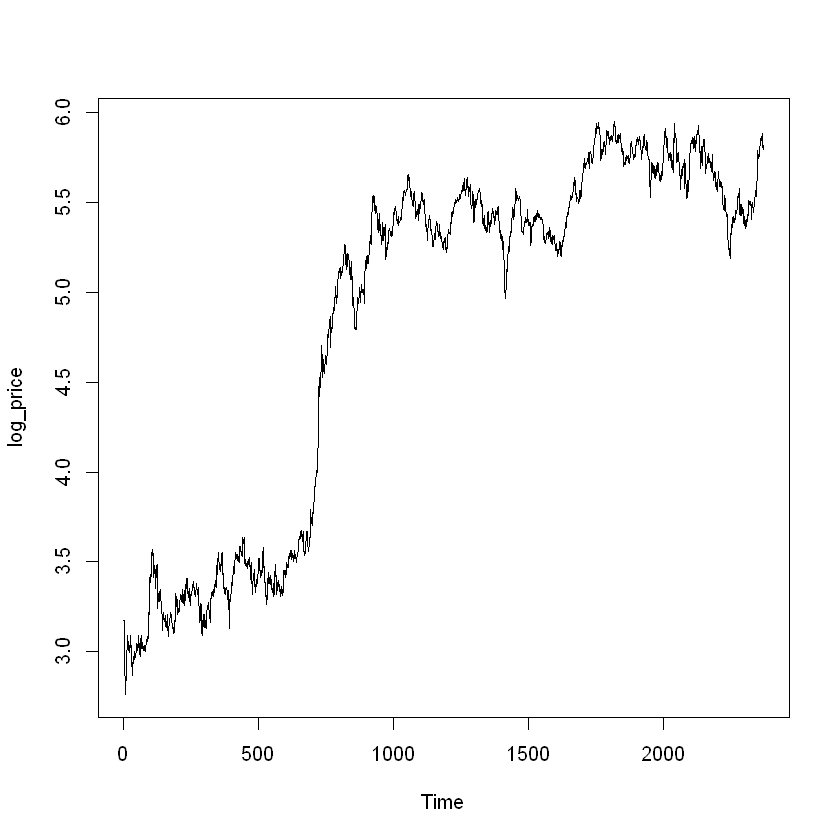

In [15]:
ts.plot(log_price)

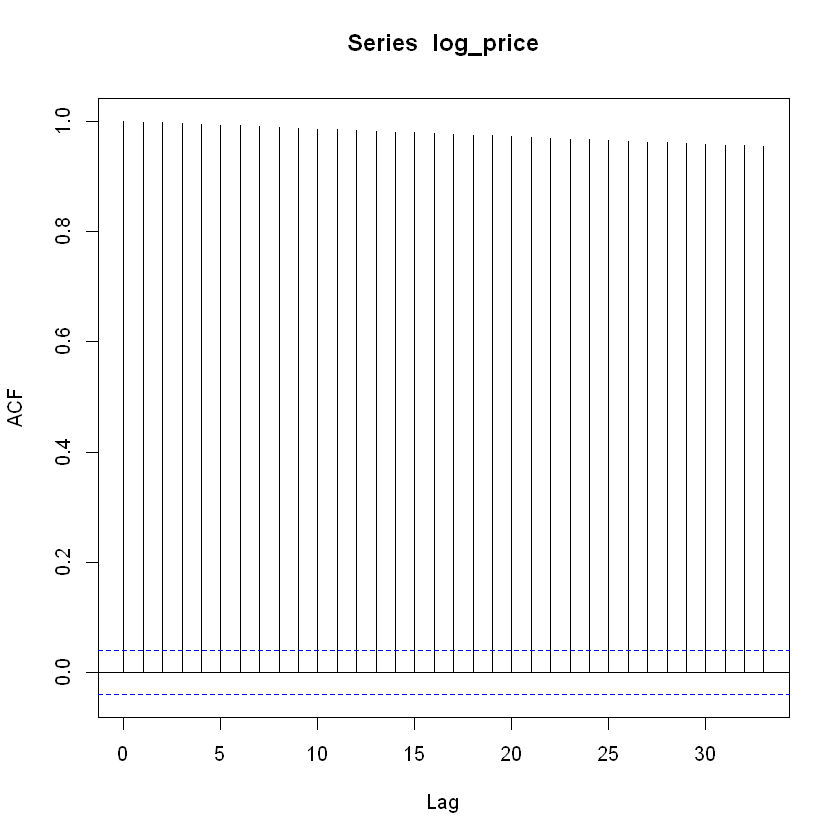

In [16]:
acf(log_price)

In [17]:
rtn = diff(log_price)*100

In [18]:
adfTest(log_price, type="c", lags=12)


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 12
  STATISTIC:
    Dickey-Fuller: -1.5429
  P VALUE:
    0.484 

Description:
 Sun Dec 15 20:55:17 2019 by user: Hyojun


In [19]:
is.null(rtn)

[1] FALSE

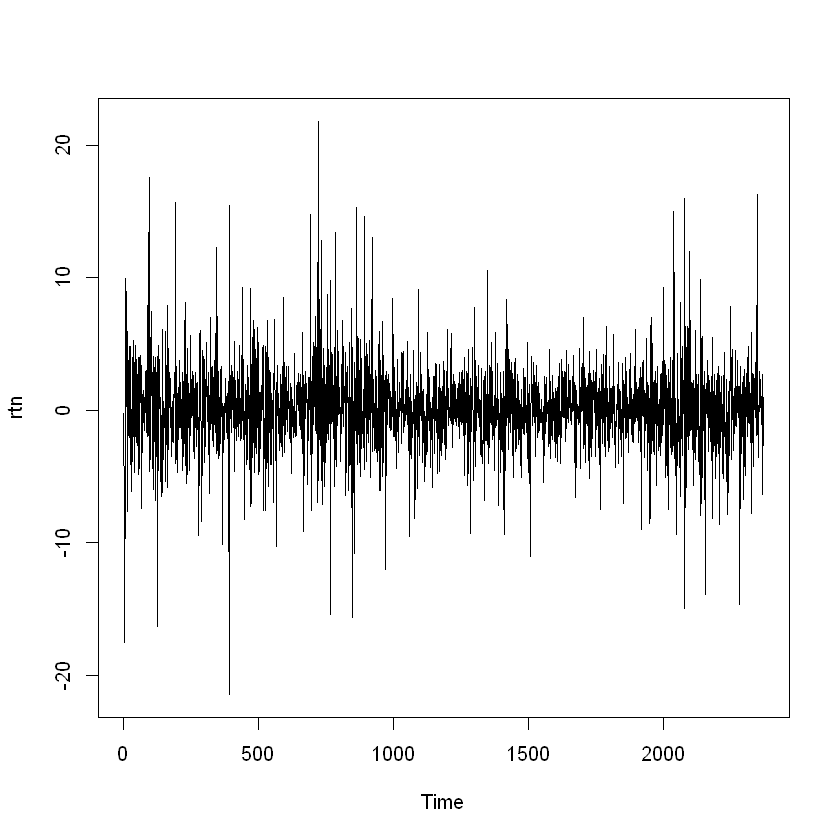

In [20]:
ts.plot(rtn)

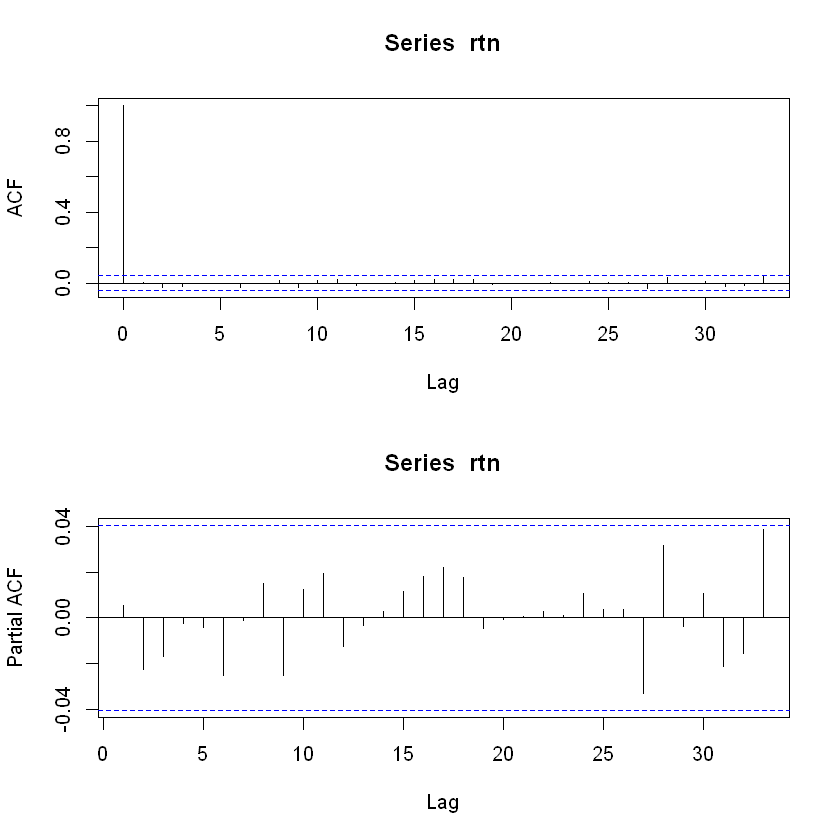

In [21]:
par(mfcol=c(2,1))
acf(rtn)
pacf(rtn)

In [22]:
t.test(price)


	One Sample t-test

data:  price
t = 77.892, df = 2372, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 176.8642 185.9995
sample estimates:
mean of x 
 181.4319 


In [23]:
Box.test(rtn, type='Ljung',lag=12)


	Box-Ljung test

data:  rtn
X-squared = 7.0255, df = 12, p-value = 0.8559


In [24]:
Box.test(abs(rtn), type='Ljung',lag=12)


	Box-Ljung test

data:  abs(rtn)
X-squared = 131.63, df = 12, p-value < 2.2e-16


In [25]:
y = rtn-mean(rtn)

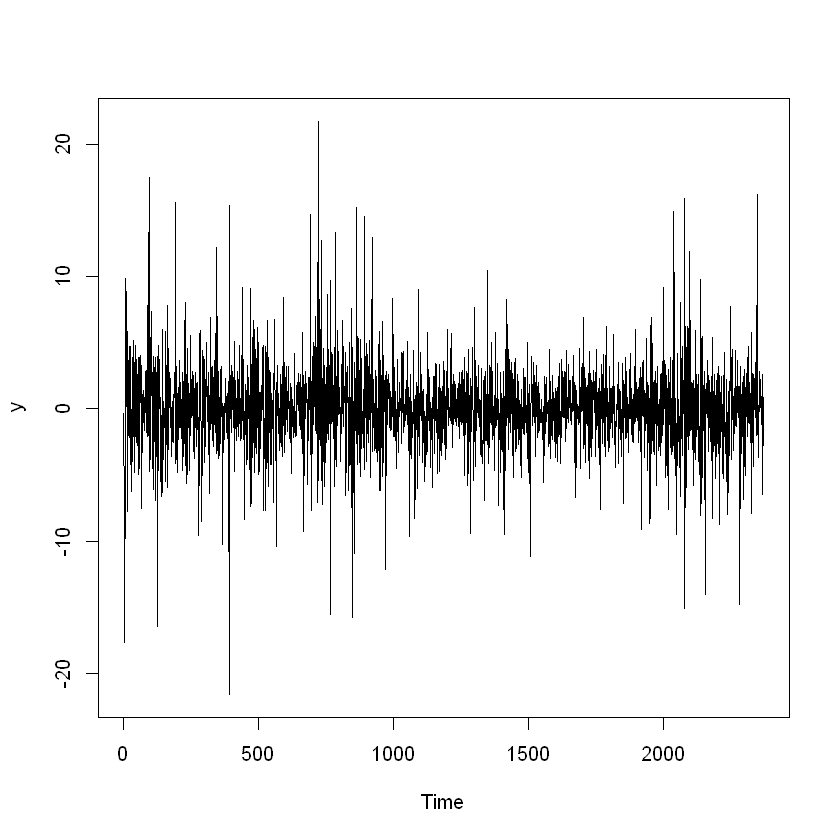

In [26]:
ts.plot(y)

In [27]:
y2 = y*y

In [28]:
Box.test(y2, type='Ljung',lag=12)


	Box-Ljung test

data:  y2
X-squared = 105.73, df = 12, p-value < 2.2e-16


In [29]:
source("archTest.R")

In [30]:
archTest(y,12)


Call:
lm(formula = atsq ~ x)

Residuals:
   Min     1Q Median     3Q    Max 
-59.75  -8.35  -6.39  -0.93 458.45 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.190518   0.810760   8.869  < 2e-16 ***
x1           0.141829   0.020636   6.873 8.03e-12 ***
x2           0.041404   0.020838   1.987   0.0470 *  
x3           0.027956   0.020809   1.343   0.1793    
x4           0.012624   0.020804   0.607   0.5440    
x5          -0.004095   0.020798  -0.197   0.8439    
x6          -0.021942   0.020792  -1.055   0.2914    
x7           0.010001   0.020768   0.482   0.6302    
x8           0.037432   0.020745   1.804   0.0713 .  
x9          -0.031020   0.020337  -1.525   0.1273    
x10          0.041858   0.020260   2.066   0.0389 *  
x11          0.010376   0.020253   0.512   0.6085    
x12          0.023676   0.019999   1.184   0.2366    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 27.91 on 2347 degrees 

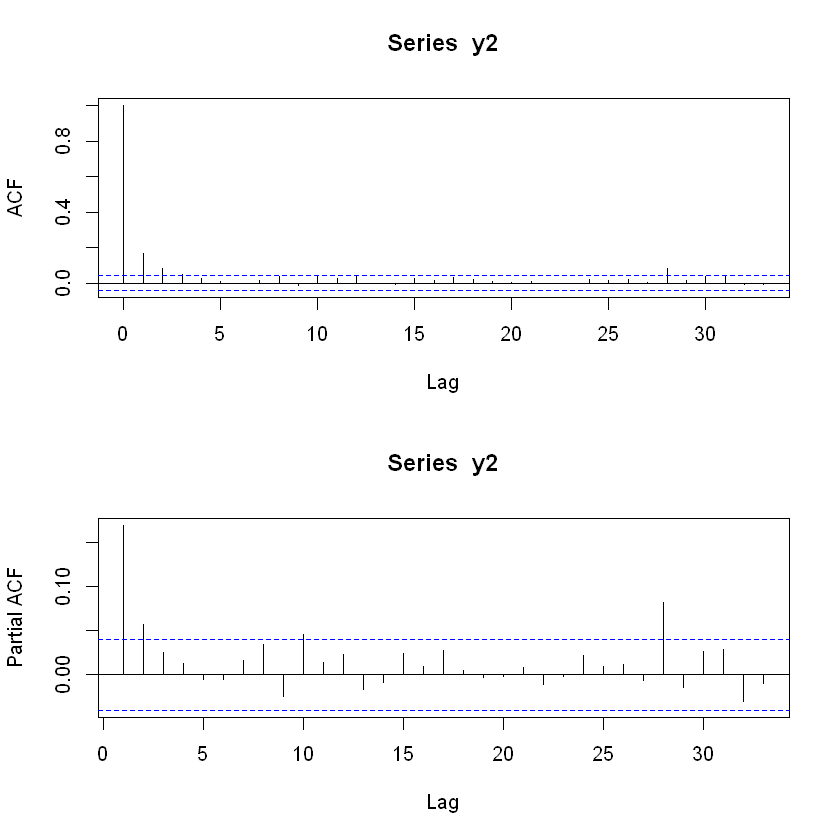

In [31]:
par(mfcol=c(2,1))
acf(y2)
pacf(y2)

In [32]:
library(fGarch)

In [33]:
m1 = garchFit(~garch(2,0),data=rtn,trace=F)
m2 = garchFit(~garch(2,1),data=rtn,trace=F)
m3 = garchFit(~garch(2,2),data=rtn,trace=F)
m4 = garchFit(~garch(2,0),data=rtn,trace=F, cond.dist = "std")
m5 = garchFit(~garch(2,1),data=rtn,trace=F, cond.dist = "std")
m6 = garchFit(~garch(2,2),data=rtn,trace=F, cond.dist = "std")
m7 = garchFit(~garch(2,0),data=rtn,trace=F, cond.dist = "sstd")
m8 = garchFit(~garch(2,1),data=rtn,trace=F, cond.dist = "sstd")
m9 = garchFit(~garch(2,2),data=rtn,trace=F, cond.dist = "sstd")

Warning message in sqrt(diag(fit$cvar)):
"NaN이 생성되었습니다"Warning message in sqrt(diag(fit$cvar)):
"NaN이 생성되었습니다"

In [34]:
summary(m1)


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~garch(2, 0), data = rtn, trace = F) 

Mean and Variance Equation:
 data ~ garch(2, 0)
<environment: 0x000000005538d6a0>
 [data = rtn]

Conditional Distribution:
 norm 

Coefficient(s):
     mu    omega   alpha1   alpha2  
0.14013  8.19406  0.11165  0.10521  

Std. Errors:
 based on Hessian 

Error Analysis:
        Estimate  Std. Error  t value Pr(>|t|)    
mu       0.14013     0.06312    2.220   0.0264 *  
omega    8.19406     0.33776   24.260  < 2e-16 ***
alpha1   0.11165     0.02233    4.999 5.76e-07 ***
alpha2   0.10521     0.02674    3.935 8.31e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Log Likelihood:
 -6092.082    normalized:  -2.568331 

Description:
 Sun Dec 15 20:55:19 2019 by user: Hyojun 


Standardised Residuals Tests:
                                Statistic p-Value  
 Jarque-Bera Test   R    Chi^2  3191.281  0        
 Shapiro-Wilk Test  R    W      0.93773   0        
 Ljung-Box Test

In [35]:
summary(m2)


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~garch(2, 1), data = rtn, trace = F) 

Mean and Variance Equation:
 data ~ garch(2, 1)
<environment: 0x0000000058bf0428>
 [data = rtn]

Conditional Distribution:
 norm 

Coefficient(s):
      mu     omega    alpha1    alpha2     beta1  
0.116203  4.651646  0.105824  0.054882  0.393548  

Std. Errors:
 based on Hessian 

Error Analysis:
        Estimate  Std. Error  t value Pr(>|t|)    
mu       0.11620     0.06307    1.843 0.065397 .  
omega    4.65165     0.96969    4.797 1.61e-06 ***
alpha1   0.10582     0.02154    4.914 8.93e-07 ***
alpha2   0.05488     0.03452    1.590 0.111879    
beta1    0.39355     0.11698    3.364 0.000767 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Log Likelihood:
 -6085.856    normalized:  -2.565707 

Description:
 Sun Dec 15 20:55:19 2019 by user: Hyojun 


Standardised Residuals Tests:
                                Statistic p-Value  
 Jarque-Bera Test   R    Chi^2  3211.427

In [36]:
summary(m3)


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~garch(2, 2), data = rtn, trace = F) 

Mean and Variance Equation:
 data ~ garch(2, 2)
<environment: 0x000000004bffe048>
 [data = rtn]

Conditional Distribution:
 norm 

Coefficient(s):
        mu       omega      alpha1      alpha2       beta1       beta2  
0.08514414  0.07755581  0.02674564  0.00000001  0.36122365  0.60442248  

Std. Errors:
 based on Hessian 

Error Analysis:
        Estimate  Std. Error  t value Pr(>|t|)  
mu     8.514e-02   6.185e-02    1.377   0.1686  
omega  7.756e-02   3.787e-02    2.048   0.0406 *
alpha1 2.675e-02   1.417e-02    1.888   0.0591 .
alpha2 1.000e-08   2.639e-02    0.000   1.0000  
beta1  3.612e-01   6.261e-01    0.577   0.5640  
beta2  6.044e-01   6.111e-01    0.989   0.3226  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Log Likelihood:
 -6071.889    normalized:  -2.559818 

Description:
 Sun Dec 15 20:55:19 2019 by user: Hyojun 


Standardised Residuals Tests:
           

In [37]:
summary(m4)


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~garch(2, 0), data = rtn, cond.dist = "std", 
    trace = F) 

Mean and Variance Equation:
 data ~ garch(2, 0)
<environment: 0x000000004cde6ea0>
 [data = rtn]

Conditional Distribution:
 std 

Coefficient(s):
     mu    omega   alpha1   alpha2    shape  
0.14170  8.40772  0.13381  0.11742  3.59518  

Std. Errors:
 based on Hessian 

Error Analysis:
        Estimate  Std. Error  t value Pr(>|t|)    
mu       0.14170     0.05185    2.733 0.006281 ** 
omega    8.40772     0.72599   11.581  < 2e-16 ***
alpha1   0.13381     0.03731    3.587 0.000335 ***
alpha2   0.11742     0.03659    3.209 0.001331 ** 
shape    3.59518     0.28338   12.687  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Log Likelihood:
 -5878.453    normalized:  -2.478269 

Description:
 Sun Dec 15 20:55:19 2019 by user: Hyojun 


Standardised Residuals Tests:
                                Statistic p-Value  
 Jarque-Bera Test   R    Ch

In [38]:
summary(m5)


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~garch(2, 1), data = rtn, cond.dist = "std", 
    trace = F) 

Mean and Variance Equation:
 data ~ garch(2, 1)
<environment: 0x000000004da94b58>
 [data = rtn]

Conditional Distribution:
 std 

Coefficient(s):
        mu       omega      alpha1      alpha2       beta1       shape  
0.11587659  0.18762719  0.03418391  0.00000001  0.95018970  3.60959970  

Std. Errors:
 based on Hessian 

Error Analysis:
        Estimate  Std. Error  t value Pr(>|t|)    
mu     1.159e-01   5.072e-02    2.284   0.0223 *  
omega  1.876e-01   9.532e-02    1.968   0.0490 *  
alpha1 3.418e-02   1.737e-02    1.968   0.0491 *  
alpha2 1.000e-08   1.998e-02    0.000   1.0000    
beta1  9.502e-01   1.720e-02   55.235   <2e-16 ***
shape  3.610e+00   2.882e-01   12.526   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Log Likelihood:
 -5862.527    normalized:  -2.471555 

Description:
 Sun Dec 15 20:55:20 2019 by user: Hyojun 


Stan

In [39]:
summary(m6)


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~garch(2, 2), data = rtn, cond.dist = "std", 
    trace = F) 

Mean and Variance Equation:
 data ~ garch(2, 2)
<environment: 0x000000004c363b18>
 [data = rtn]

Conditional Distribution:
 std 

Coefficient(s):
        mu       omega      alpha1      alpha2       beta1       beta2  
0.11722641  0.26488723  0.04881269  0.00000001  0.45923499  0.46969398  
     shape  
3.62701156  

Std. Errors:
 based on Hessian 

Error Analysis:
        Estimate  Std. Error  t value Pr(>|t|)    
mu     1.172e-01   5.059e-02    2.317 0.020503 *  
omega  2.649e-01   5.049e-02    5.246 1.55e-07 ***
alpha1 4.881e-02   1.402e-02    3.482 0.000498 ***
alpha2 1.000e-08          NA       NA       NA    
beta1  4.592e-01          NA       NA       NA    
beta2  4.697e-01          NA       NA       NA    
shape  3.627e+00   2.797e-01   12.966  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Log Likelihood:
 -5861.669    normalized

In [40]:
summary(m7)


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~garch(2, 0), data = rtn, cond.dist = "sstd", 
    trace = F) 

Mean and Variance Equation:
 data ~ garch(2, 0)
<environment: 0x000000004c8049e0>
 [data = rtn]

Conditional Distribution:
 sstd 

Coefficient(s):
     mu    omega   alpha1   alpha2     skew    shape  
0.14726  8.40979  0.13414  0.11775  1.00454  3.59242  

Std. Errors:
 based on Hessian 

Error Analysis:
        Estimate  Std. Error  t value Pr(>|t|)    
mu       0.14726     0.06158    2.391 0.016791 *  
omega    8.40979     0.72720   11.565  < 2e-16 ***
alpha1   0.13414     0.03742    3.584 0.000338 ***
alpha2   0.11775     0.03673    3.206 0.001345 ** 
skew     1.00454     0.02713   37.025  < 2e-16 ***
shape    3.59242     0.28364   12.665  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Log Likelihood:
 -5878.439    normalized:  -2.478263 

Description:
 Sun Dec 15 20:55:21 2019 by user: Hyojun 


Standardised Residuals Tests:
        

In [41]:
summary(m8)


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~garch(2, 1), data = rtn, cond.dist = "sstd", 
    trace = F) 

Mean and Variance Equation:
 data ~ garch(2, 1)
<environment: 0x000000004d07bf68>
 [data = rtn]

Conditional Distribution:
 sstd 

Coefficient(s):
        mu       omega      alpha1      alpha2       beta1        skew  
0.10186305  0.18845336  0.03424186  0.00000001  0.95000976  0.98802024  
     shape  
3.61563031  

Std. Errors:
 based on Hessian 

Error Analysis:
        Estimate  Std. Error  t value Pr(>|t|)    
mu     1.019e-01   5.983e-02    1.703   0.0887 .  
omega  1.885e-01   9.527e-02    1.978   0.0479 *  
alpha1 3.424e-02   1.739e-02    1.969   0.0490 *  
alpha2 1.000e-08   1.998e-02    0.000   1.0000    
beta1  9.500e-01   1.718e-02   55.288   <2e-16 ***
skew   9.880e-01   2.687e-02   36.768   <2e-16 ***
shape  3.616e+00   2.890e-01   12.512   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Log Likelihood:
 -5862.429    normaliz

In [42]:
summary(m9)


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~garch(2, 2), data = rtn, cond.dist = "sstd", 
    trace = F) 

Mean and Variance Equation:
 data ~ garch(2, 2)
<environment: 0x000000004d39fcb0>
 [data = rtn]

Conditional Distribution:
 sstd 

Coefficient(s):
        mu       omega      alpha1      alpha2       beta1       beta2  
0.10321796  0.26660702  0.04901466  0.00000001  0.45414841  0.47435477  
      skew       shape  
0.98799236  3.63347463  

Std. Errors:
 based on Hessian 

Error Analysis:
        Estimate  Std. Error  t value Pr(>|t|)    
mu     1.032e-01   5.945e-02    1.736 0.082549 .  
omega  2.666e-01   5.043e-02    5.287 1.25e-07 ***
alpha1 4.901e-02   1.411e-02    3.475 0.000511 ***
alpha2 1.000e-08          NA       NA       NA    
beta1  4.541e-01          NA       NA       NA    
beta2  4.744e-01          NA       NA       NA    
skew   9.880e-01   2.682e-02   36.843  < 2e-16 ***
shape  3.633e+00   2.809e-01   12.936  < 2e-16 ***
---
Signif. codes:  0 '***' 0.0

###### Model diagnostic

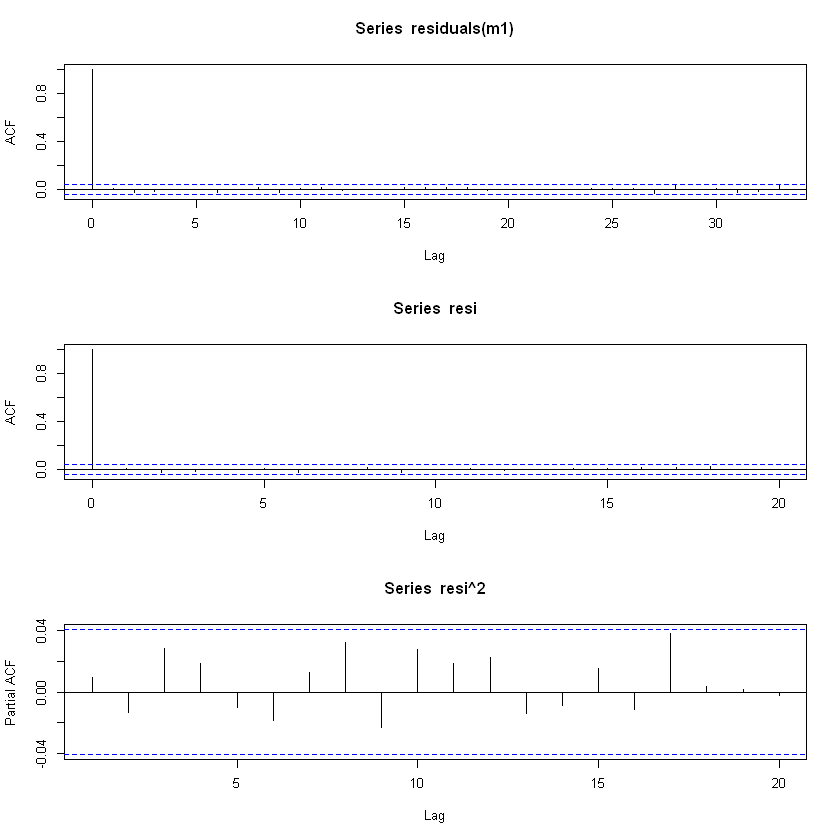

In [43]:
par(mfcol=c(3,1))
acf(residuals(m1))
resi=residuals(m1,standardize=T)
acf(resi,lag=20)
pacf(resi^2, lag=20)

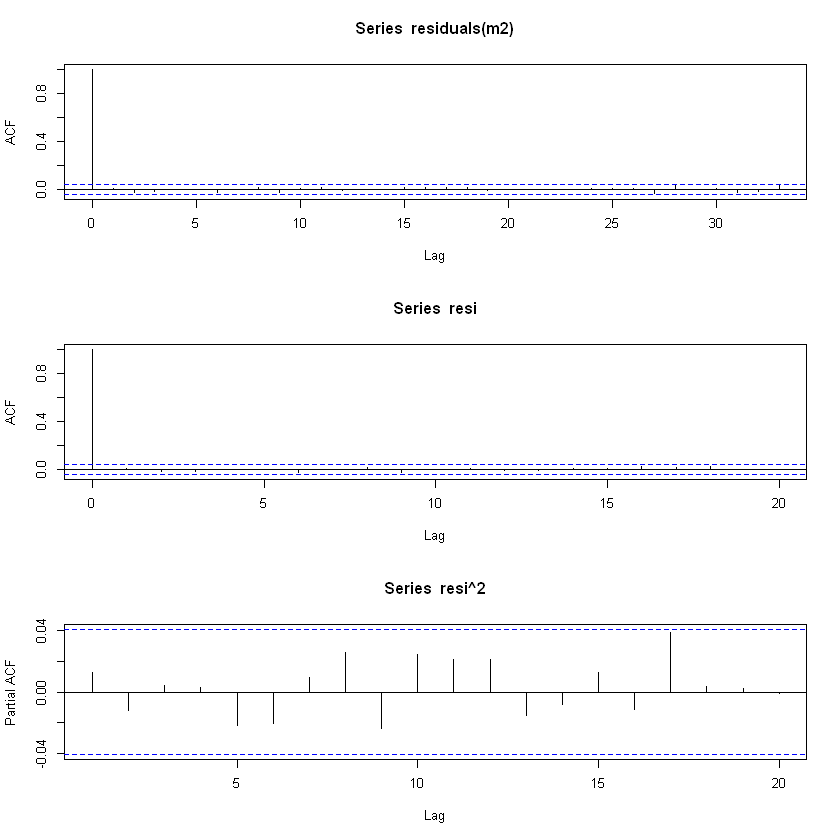

In [44]:
par(mfcol=c(3,1))
acf(residuals(m2))
resi=residuals(m2,standardize=T)
acf(resi,lag=20)
pacf(resi^2, lag=20)

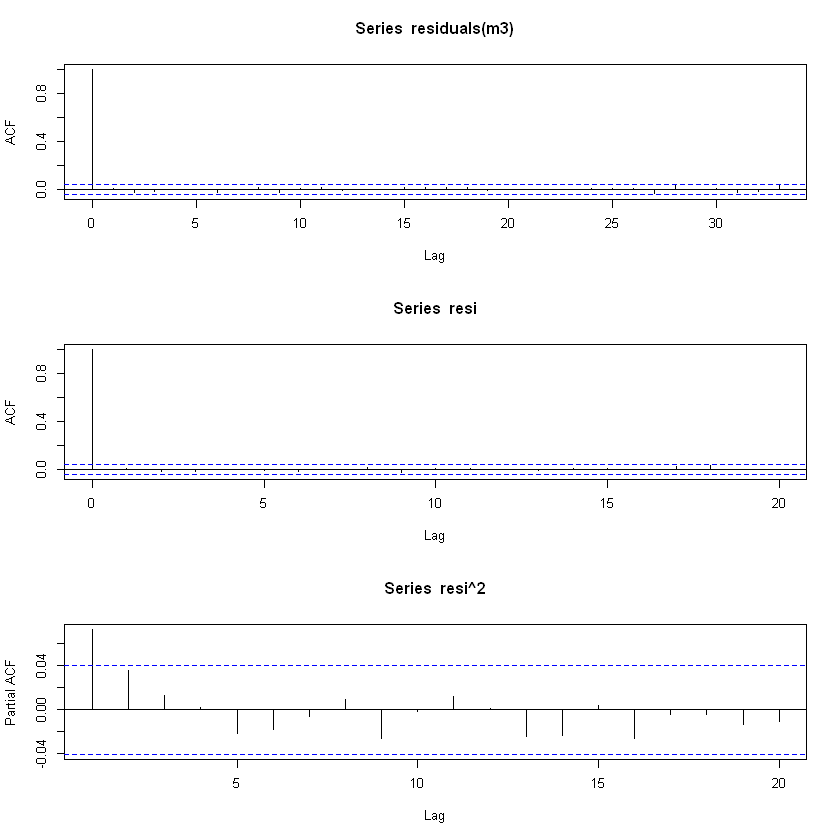

In [45]:
par(mfcol=c(3,1))
acf(residuals(m3))
resi=residuals(m3,standardize=T)
acf(resi,lag=20)
pacf(resi^2, lag=20)

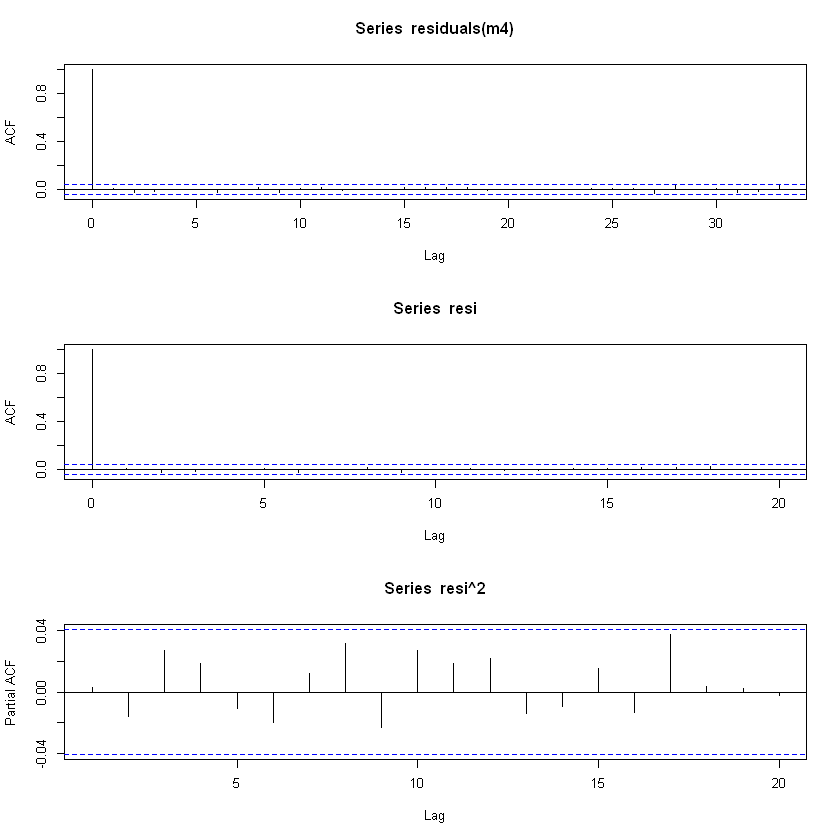

In [46]:
par(mfcol=c(3,1))
acf(residuals(m4))
resi=residuals(m4,standardize=T)
acf(resi,lag=20)
pacf(resi^2, lag=20)

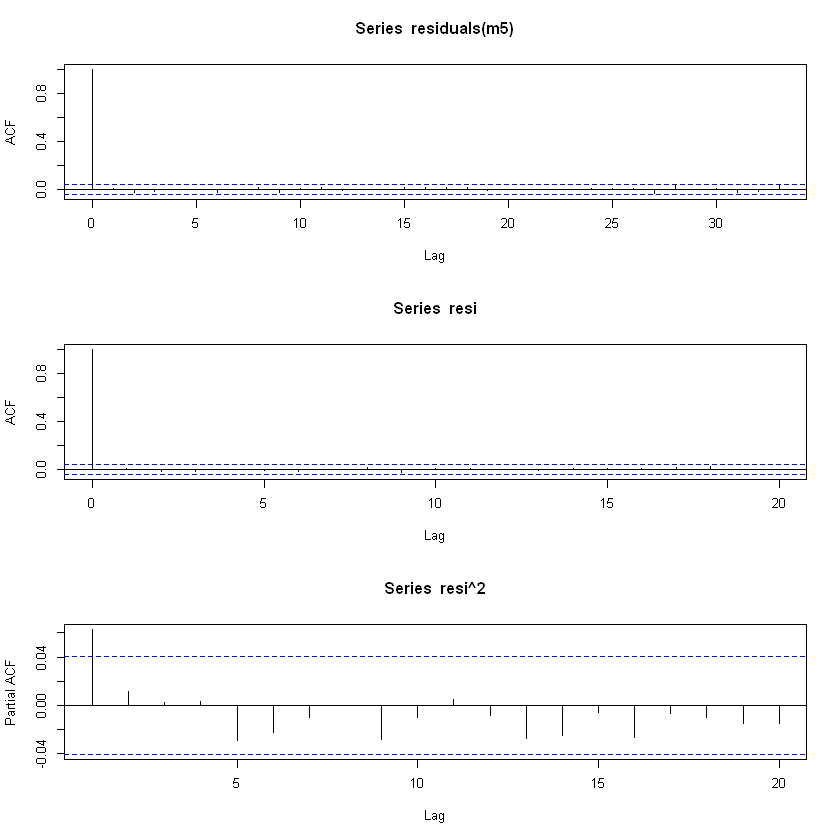

In [47]:
par(mfcol=c(3,1))
acf(residuals(m5))
resi=residuals(m5,standardize=T)
acf(resi,lag=20)
pacf(resi^2, lag=20)

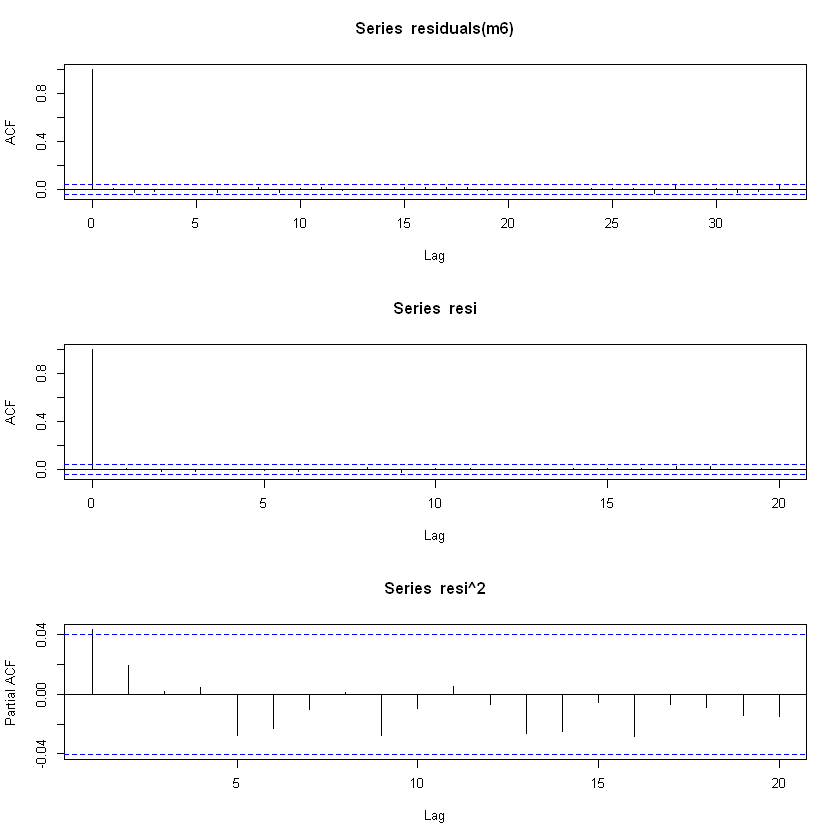

In [48]:
par(mfcol=c(3,1))
acf(residuals(m6))
resi=residuals(m6,standardize=T)
acf(resi,lag=20)
pacf(resi^2, lag=20)

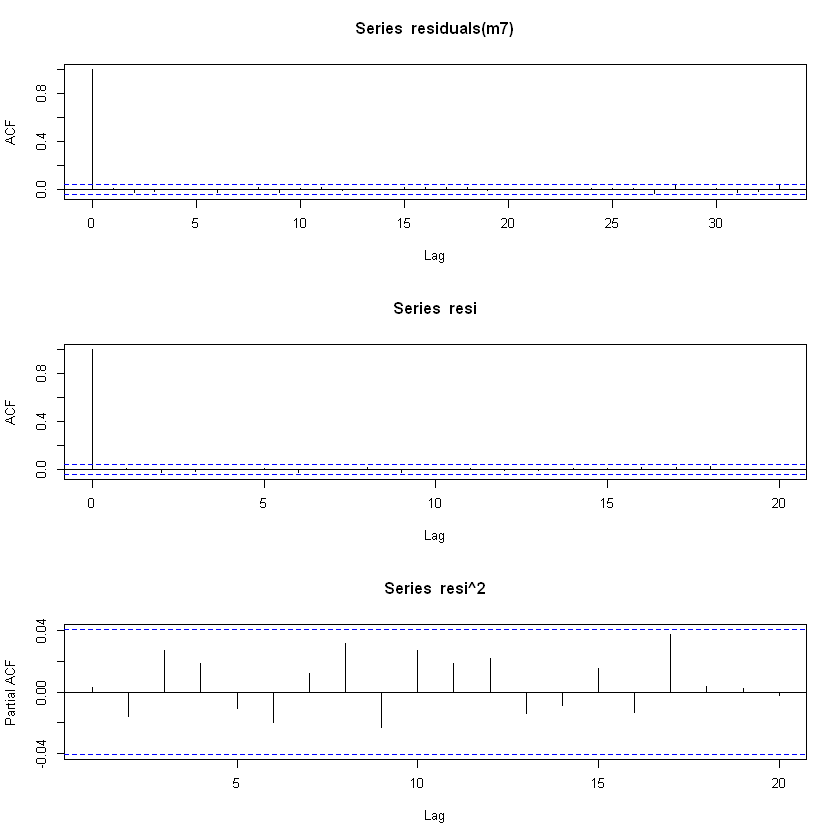

In [49]:
par(mfcol=c(3,1))
acf(residuals(m7))
resi=residuals(m7,standardize=T)
acf(resi,lag=20)
pacf(resi^2, lag=20)

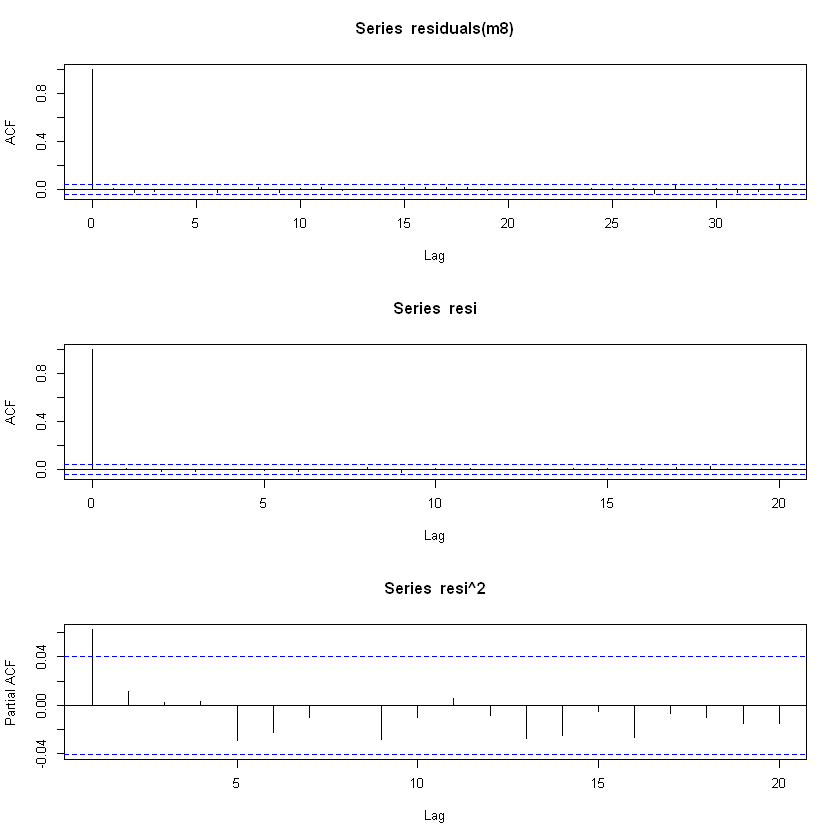

In [50]:
par(mfcol=c(3,1))
acf(residuals(m8))
resi=residuals(m8,standardize=T)
acf(resi,lag=20)
pacf(resi^2, lag=20)

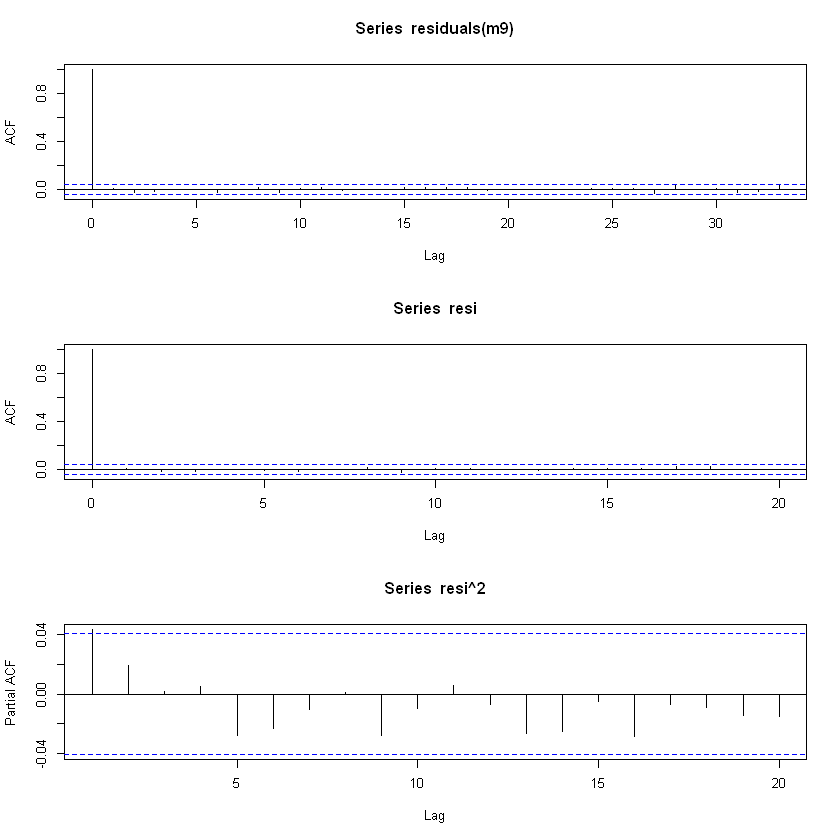

In [51]:
par(mfcol=c(3,1))
acf(residuals(m9))
resi=residuals(m9,standardize=T)
acf(resi,lag=20)
pacf(resi^2, lag=20)

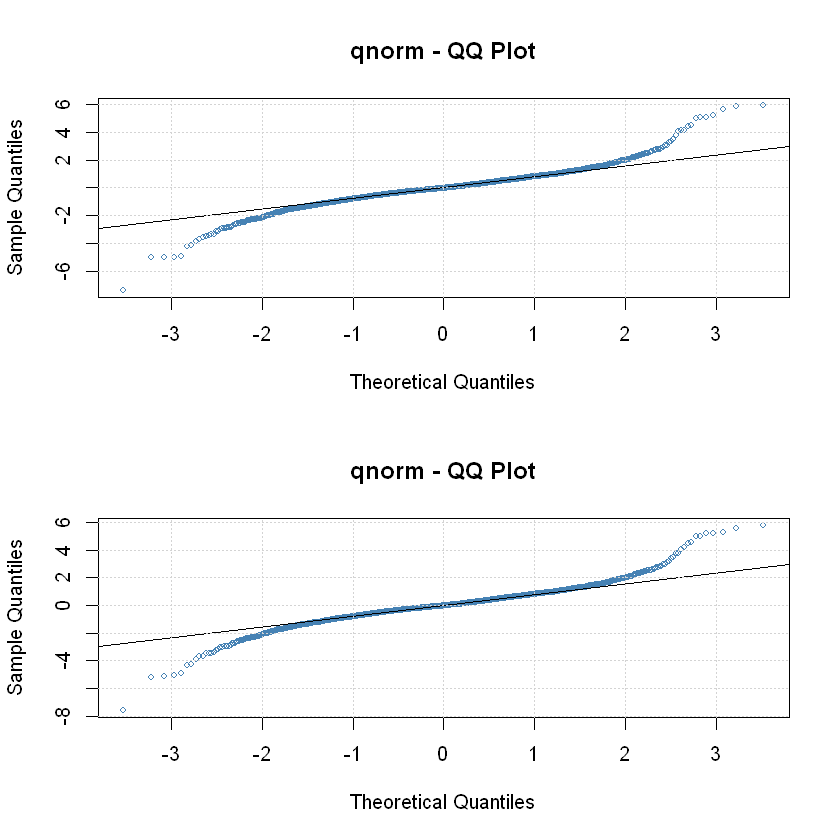

In [52]:
par(mfcol=c(2,1))
plot(m1, which =13)
plot(m2, which =13)

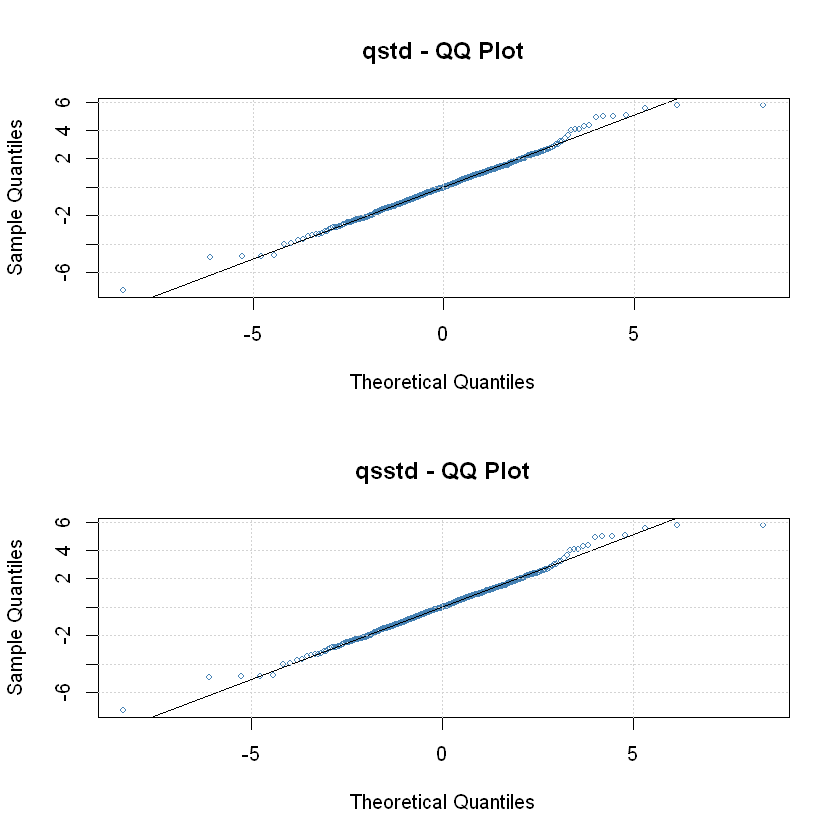

In [53]:
par(mfcol=c(2,1))
plot(m4, which =13)
plot(m7, which =13)

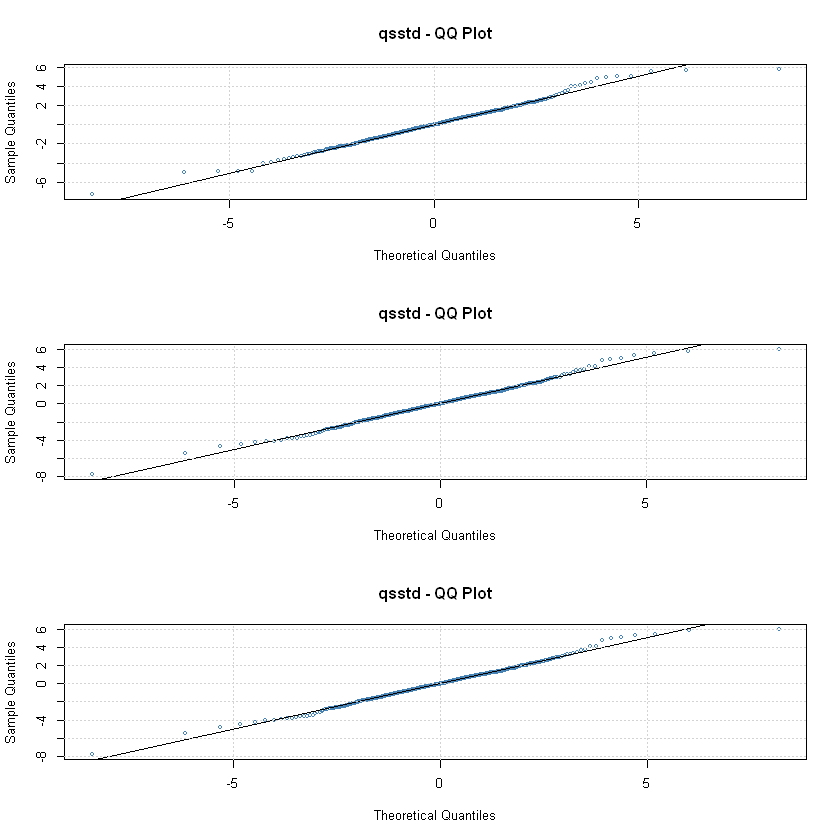

In [54]:
par(mfcol=c(3,1))
plot(m7, which =13)
plot(m8, which =13)
plot(m9, which =13)

In [55]:
plot(m4, which =14)

meanForecast,meanError,standardDeviation,lowerInterval,upperInterval
0.1416969,2.913278,2.913278,-5.494060,5.777454
0.1416969,3.094982,3.094982,-5.845567,6.128961
0.1416969,3.268957,3.268957,-6.182123,6.465517
0.1416969,3.310956,3.310956,-6.263369,6.546763
0.1416969,3.336078,3.336078,-6.311968,6.595362
0.1416969,3.344280,3.344280,-6.327835,6.611229


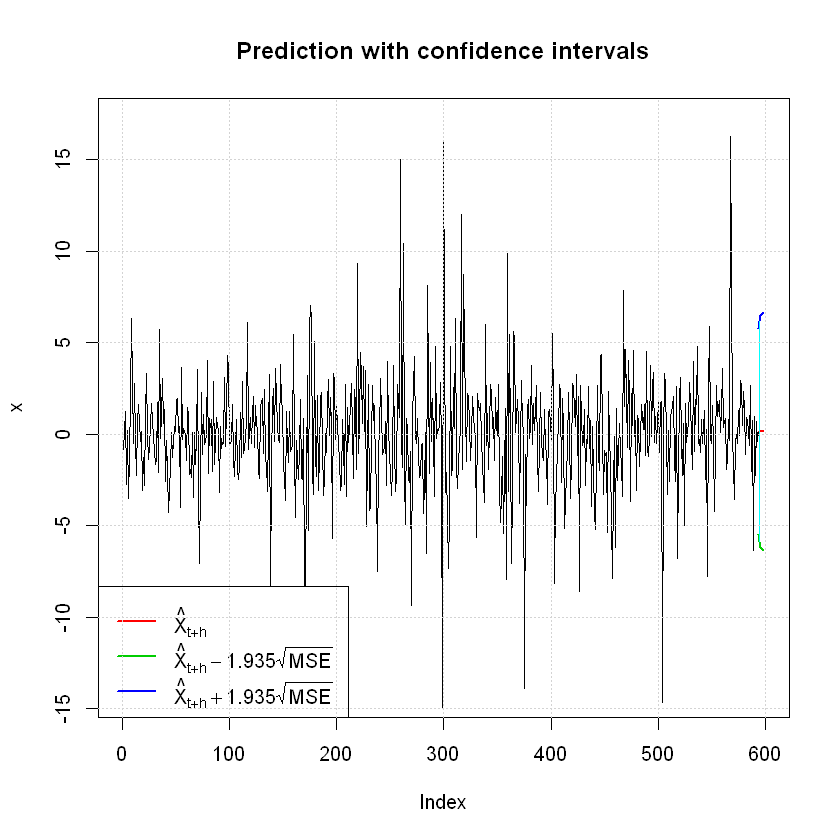

In [56]:
predict(m4,n.ahead=6,plot=TRUE)

In [57]:
m4


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~garch(2, 0), data = rtn, cond.dist = "std", 
    trace = F) 

Mean and Variance Equation:
 data ~ garch(2, 0)
<environment: 0x000000004cde6ea0>
 [data = rtn]

Conditional Distribution:
 std 

Coefficient(s):
     mu    omega   alpha1   alpha2    shape  
0.14170  8.40772  0.13381  0.11742  3.59518  

Std. Errors:
 based on Hessian 

Error Analysis:
        Estimate  Std. Error  t value Pr(>|t|)    
mu       0.14170     0.05185    2.733 0.006281 ** 
omega    8.40772     0.72599   11.581  < 2e-16 ***
alpha1   0.13381     0.03731    3.587 0.000335 ***
alpha2   0.11742     0.03659    3.209 0.001331 ** 
shape    3.59518     0.28338   12.687  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Log Likelihood:
 -5878.453    normalized:  -2.478269 

Description:
 Sun Dec 15 20:55:19 2019 by user: Hyojun 


In [58]:
tail(y2)

[1]  0.3938730 41.5805550  0.7661606  5.4825252  0.3687770  0.2693794

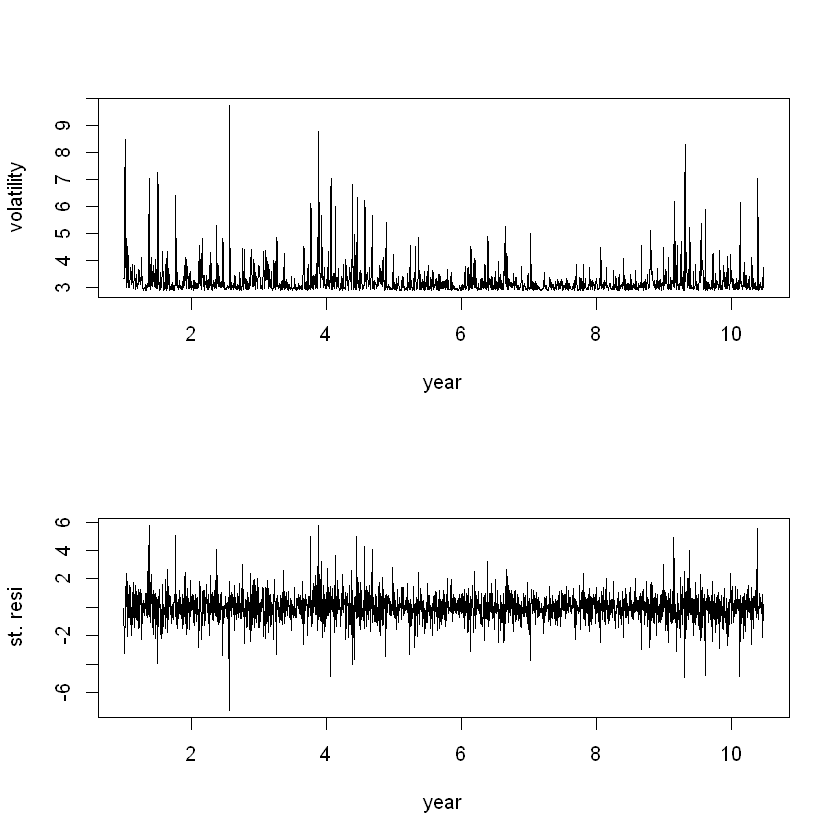

In [59]:
v1=volatility(m4) 
resi=residuals(m4,standardize=T) # Standardized residuals

vol=ts(v1,frequency=250)
res=ts(resi,frequency=250)

par(mfcol=c(2,1)) # Show volatility and residuals
plot(vol,xlab='year',ylab='volatility',type='l')
plot(res,xlab='year',ylab='st. resi',type='l')
## volatility: oil crisis 1973 - 1974, internet bubble around 2000

In [81]:
# Obtain plot of predictive intervals
## 95% intervals: mean +/- 2*std



par(mfcol=c(1,1))
upp=0.0112+2*v1
low=0.0112-2*v1

tdx=c(1:2377) / 365+2010
 
plot(tdx,rtn, xlab='year',ylab='series', type='l')

lines(tdx,upp,lty=2,col='red')
lines(tdx,low,lty=2,col='red')

abline(h=c(0.0112)) ## line for mean level

ERROR: Error in xy.coords(x, y, xlabel, ylabel, log): 'x' and 'y' lengths differ


In [61]:
length(rtn)


[1] 2372

In [82]:
prediction.plot(results, m4, 
dataset = rtn, 
absolute = TRUE, 
spacing = 2, 
axis.labels = NULL, 
ylim, model.type = c("easy", "eqn", "eqn2"), 
args.plot = list(), args.rect = list(), args.box = list(), args.points = list(), 
args.labels = list(), numbers = c("individual", "continuous"), 
pos.numbers = c("plot", "axis"), args.numbers = list(), args.abline = list(), abline)

ERROR: Error in prediction.plot(results, m4, dataset = rtn, absolute = TRUE, : 함수 "prediction.plot"를 찾을 수 없습니다


In [63]:
Box.test(m4$residuals,type='Ljung',lag=10)

ERROR: Error in m4$residuals: $ operator not defined for this S4 class


In [64]:
checkresiduals(m4)

ERROR: Error: $ operator not defined for this S4 class


In [65]:
data_compared = getSymbols(Symbols="TSLA", src = "yahoo", from= "2019-11-29", to = "2019-12-07", auto.assign = FALSE)

In [66]:
head(data_compared)

           TSLA.Open TSLA.High TSLA.Low TSLA.Close TSLA.Volume TSLA.Adjusted
2019-11-29    331.11    331.26   327.50     329.94     2465600        329.94
2019-12-02    329.40    336.38   328.69     334.87     6074500        334.87
2019-12-03    332.62    337.91   332.19     336.20     6573700        336.20
2019-12-04    337.75    337.86   332.85     333.03     5533000        333.03
2019-12-05    332.83    334.42   327.25     330.37     3724600        330.37
2019-12-06    335.00    338.86   334.77     335.89     7612400        335.89

In [67]:
raw_set = log(data_compared$TSLA.Adjusted)

In [78]:
x = diff(raw_set)-mean(raw_set)

In [80]:
x^2

           TSLA.Adjusted
2019-11-29            NA
2019-12-02      33.57546
2019-12-03      33.70152
2019-12-04      33.85772
2019-12-05      33.84080
2019-12-06      33.55531

In [ ]:
mean(raw_set)